In [7]:
import nibabel as nib
import os
import matplotlib.pyplot as plt

In [8]:
data_folder = '/Users/mattf/KKI2009-42/'
files = os.listdir(data_folder)
data = []
for file in files:
    if file[-3:] == 'nii':
        data = nib.load(data_folder + file).get_data()

In [9]:
print(data.shape) # 256 voxels x 256 voxels. 25 slices. 14 brains.

(256, 256, 25, 14)


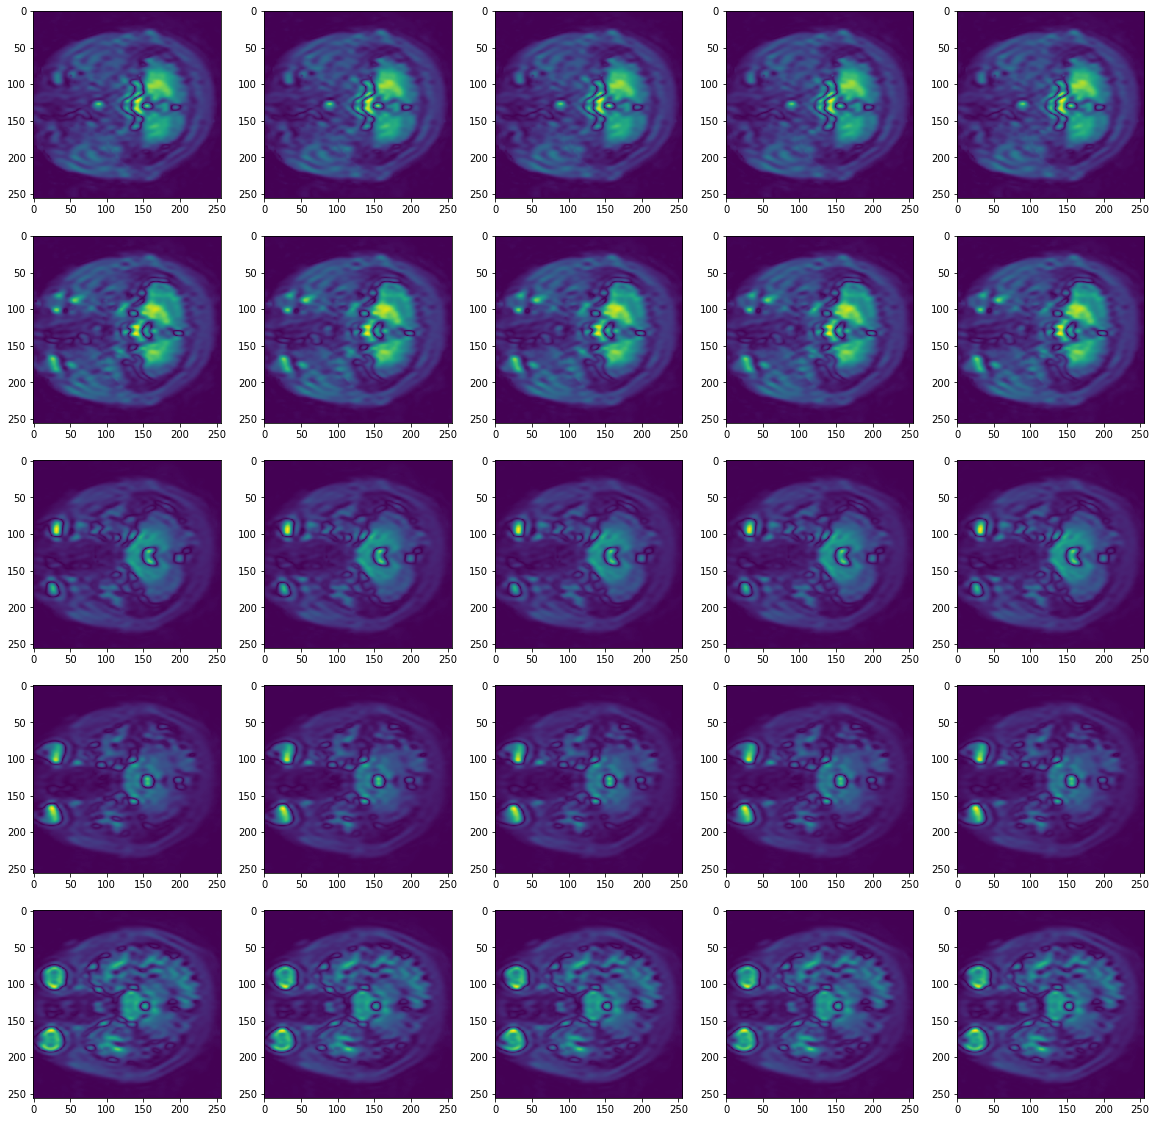

In [10]:
fig, ax = plt.subplots(5, 5, figsize = [20,20])
x, y = 0, 0
for a in range(5):
    for b in range(0, 5):
        ax[a, b].imshow(data[:, :, a, b])

In [11]:
from sklearn.cluster import KMeans
import numpy as np

In [12]:
#data = np.array(data)
#data = data.reshape(256*256*25, 14)
#print(data.shape)
#KMeans = KMeans().fit(data)

In [14]:
m = np.max(data)
mi = np.min(data)

In [15]:
# Normalize
data = (data - mi) / (m - mi)

In [16]:
print(np.min(data), np.max(data))

0.0 1.0


In [17]:
# Pad images - may be useful for future convolutions
print(data.shape)

(256, 256, 25, 14)


In [22]:
padded_data = np.zeros([259,259,25,14])
padded_data[3:, 3:, :, :] = data

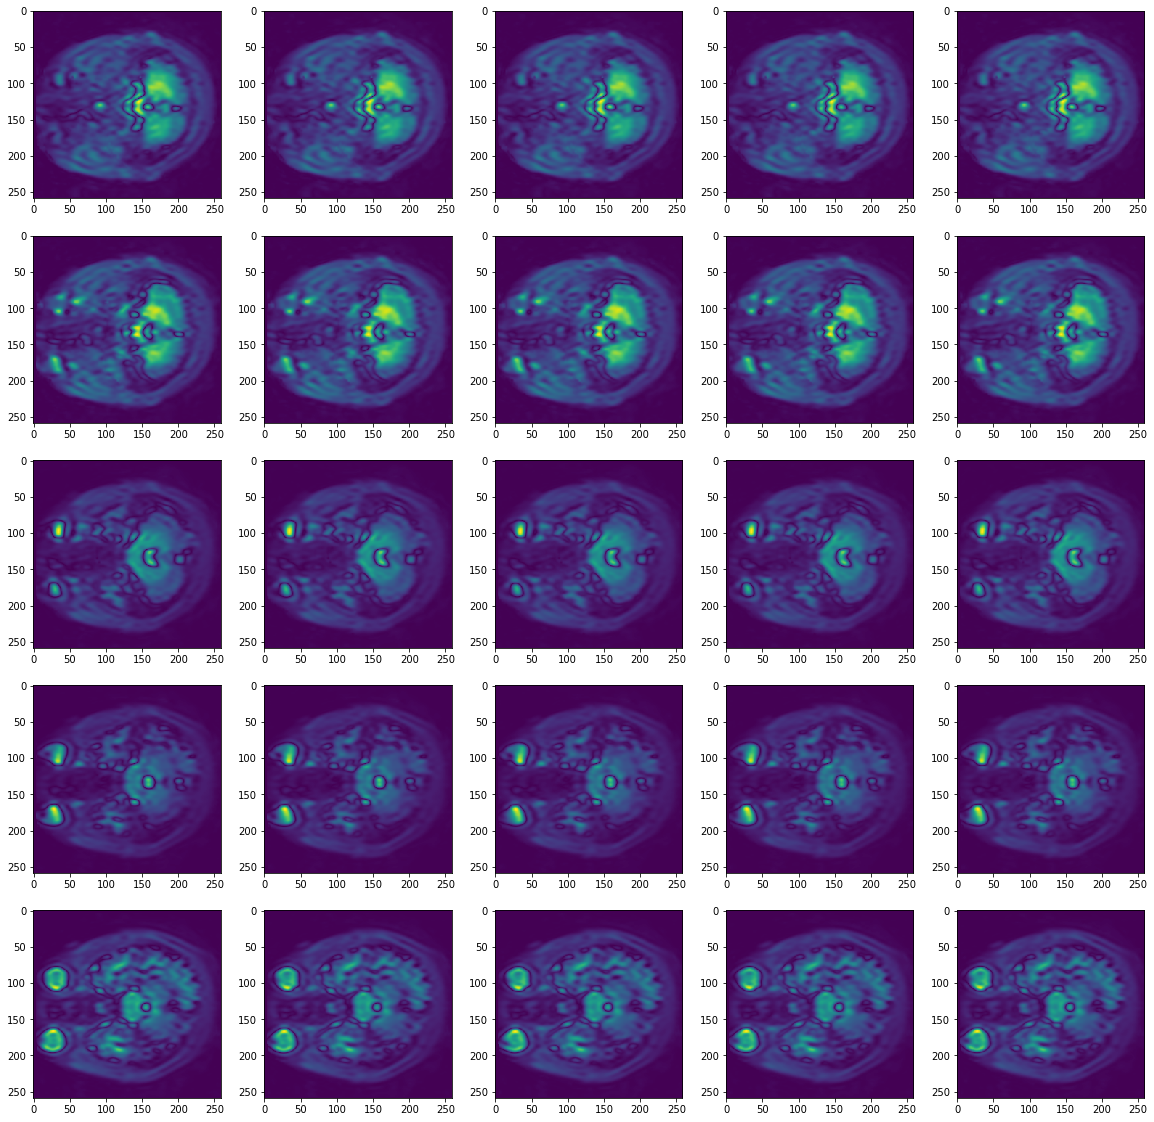

In [23]:
fig, ax = plt.subplots(5, 5, figsize = [20,20])
x, y = 0, 0
for a in range(5):
    for b in range(0, 5):
        ax[a, b].imshow(padded_data[:, :, a, b])

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)

In [74]:
samples = (padded_data[:, :, :, 0:10])
print(samples.shape)
samples = samples.reshape(259, 259, 25 * 10)
samples = samples.reshape(259 * 259, 25 * 10)
samples = samples.T
print(samples.shape)
slice_labels = np.arange(25)
for _ in range(9):
    slice_labels = np.concatenate((slice_labels, np.arange(25)))
print(slice_labels.shape)

test_samples = (padded_data[:, :, :, 10:])
print(test_samples.shape)
test_samples = test_samples.reshape(259, 259, 25*4)
test_samples = test_samples.reshape(259 * 259, 25*4)
test_samples = test_samples.T
print(test_samples.shape)
test_slice_labels = np.arange(25)
for _ in range(3):
    test_slice_labels = np.concatenate((test_slice_labels, np.arange(25)))
print(test_slice_labels)

(259, 259, 25, 10)
(250, 67081)
(250,)
(259, 259, 25, 4)
(100, 67081)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24]


In [75]:
clf.fit(samples, slice_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [76]:
print(clf.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


In [77]:
output_labels = clf.predict(test_samples)
print(output_labels, test_slice_labels)

[ 2  1  2  1 15 16 18 17  4  2  4  0 10 14 10  9 23  7 17 23  5  9  9  4
 14 14 12 17 23 22  1 21 10 13 11 11 17 16 22 16  2  2  7  2 10 19 14 19
  1  2  2  4 14 14  9 14 19 20 20 20  9  7  7  7 14 11 13 13 23 22 22  3
 14  9 14 14 23 24 24 24  6  7  8  8 14 24 11  9 23  1  1 21  6  6 10  5
 23 23 24 21] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24]


In [78]:
print(np.equal(output_labels, test_slice_labels))
print("Accuracy:", np.sum(np.equal(output_labels, test_slice_labels))/test_slice_labels.shape[0])

[False  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False  True
 False False  True False False False False False False False False False
 False False False False]
Accuracy: 0.05


In [86]:
# Poor accuracy - random forest may not have used the right pixels for classification, or I made a mistake in transforming or inputting the data.